In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np


## The dichotomy method

### Bisection Method

The bisection method is a simple one-parameter method of unconstrained optimization. It is a direct search method, where the extremum of the target function is found using only the calculated values of the target function.

Given a function F(x), we need to find $\overline{x}$ that delivers the minimum (or maximum) of the function F(x) on the interval [a, b] with a given precision $\varepsilon$, i.e., find

$$ 
\overline{x} = \arg \min_{x \in [a,b]} F(x).
$$

#### Verbal Algorithm Description:

1. At each step of the search process, divide the segment [a, b] into two halves, with $x_{1,2} = \frac{a+b}{2} \pm \delta$ being the midpoint of the segment [a, b].
2. Calculate the value of the function F(x) in the vicinity of $\pm \delta$ of the computed point x, i.e.,

   $$ 
   F_1 = F(x_1), \quad F_2 = F(x_2).
   $$

3. Compare $F_1$ and $F_2$ and discard one of the halves of the segment [a, b].

    - **When searching for the minimum:**
        - If $F_1 < F_2$, discard the segment [$x_1$, b], so b = $x_1$. 
        - If $F_1 > F_2$, discard the segment [a, $x_2$], so a = $x_2$.
        - If $F_1 = F_2$, discard the segment [a, $x_2$], so a = $x_1$ b = $x_2$.


4. Continue dividing the segment [a, b] until its length is less than the specified precision $\varepsilon$, i.e., $|b-a| \le \varepsilon$ (when this condition is satisfied then $\overline{x} = \frac{x_1 + x_2}{2}$, $F(x)=F(\overline{x})$)



Минимум функции находится в точке x ≈ -0.2879561126708983, значение функции ≈ 5.698543720805361
Итерация 1: a=-10.00000, b=11.00000, x1=0.49990, x2=0.50010, f(x)=7.63918
Итерация 2: a=-10.00000, b=0.49990, x1=-4.75015, x2=-4.74995, f(x)=655.53998
Итерация 3: a=-4.74995, b=0.49990, x1=-2.12513, x2=-2.12492, f(x)=33.23844
Итерация 4: a=-2.12492, b=0.49990, x1=-0.81261, x2=-0.81241, f(x)=7.02128
Итерация 5: a=-0.81241, b=0.49990, x1=-0.15636, x2=-0.15616, f(x)=5.76470
Итерация 6: a=-0.81241, b=-0.15636, x1=-0.48448, x2=-0.48428, f(x)=5.86398
Итерация 7: a=-0.48428, b=-0.15636, x1=-0.32042, x2=-0.32022, f(x)=5.70285
Итерация 8: a=-0.32022, b=-0.15636, x1=-0.23839, x2=-0.23819, f(x)=5.70814
Итерация 9: a=-0.32022, b=-0.23839, x1=-0.27940, x2=-0.27920, f(x)=5.69882
Итерация 10: a=-0.32022, b=-0.27940, x1=-0.29991, x2=-0.29971, f(x)=5.69913
Итерация 11: a=-0.29971, b=-0.27940, x1=-0.28966, x2=-0.28946, f(x)=5.69856
Итерация 12: a=-0.28946, b=-0.27940, x1=-0.28453, x2=-0.28433, f(x)=5.69859
Ит

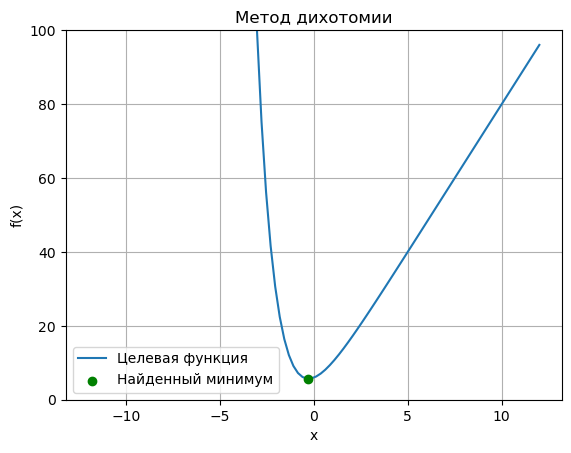

In [7]:

def dichotomy_method(f, a, b, epsilon=6e-4, delta=1e-4):
    iterations = []
    
    # stop cycle when b-a is less than delta 
    while abs(b - a) >= epsilon:
        # devide the segment into two 
        x = (a + b) / 2 

        # find function in new values x1 and x2
        x1 = x - delta
        x2 = x + delta
        f_x1 = f(x1)
        f_x2 = f(x2)
        
        # --- just to remember list of opetations
        iterations.append((a, b, x1, x2, f(x)))

        # compare new values of the functions 
        # FIND MINIMUM 
        if f_x1 < f_x2:
            b = x1 # then our new segment will be (a, x) (minimum from left side)
        if f_x1 > f_x2:
            a = x2 # then our new segment will be (x, b) (minimum from right side)
        if f_x1 == f_x2:
            a = x1
            b = x2

    return (a + b) / 2, iterations

if __name__ == "__main__":
    # parameters of the function
    a_param = 6.0
    b_param = 8.0

    def target_function(x):
        return a_param / np.exp(x) + b_param * x

    # Границы интервала поиска
    bound_a = -10
    bound_b = 11

    minimum_x, iterations = dichotomy_method(target_function, bound_a, bound_b)
    minimum_value = target_function(minimum_x)

    print(f"Минимум функции находится в точке x ≈ {minimum_x}, значение функции ≈ {minimum_value}")

    # Визуализация
    x = np.linspace(-12, 12, 100)
    y = target_function(x)
    plt.plot(x, y, label='Целевая функция')

    plt.ylim(0, 100)

    plt.scatter(minimum_x, minimum_value, color='green', zorder=10, label='Найденный минимум')
    plt.grid(True)
    plt.title("Метод дихотомии")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()

    for i, (a, b, x1, x2, f_m) in enumerate(iterations):
        print(f"Итерация {i+1}: a={a:.5f}, b={b:.5f}, x1={x1:.5f}, x2={x2:.5f}, f(x)={f_m:.5f}")

## The Golden Section Search Method

### The golden section search method

The golden section search method is a simple one-parameter method of unconstrained optimization. 

Given a function F(x), we need to find $\overline{x}$ that delivers the minimum (or maximum) of the function F(x) on the interval [a, b] with a given precision $\varepsilon$, i.e., find

$$ 
\overline{x} = \arg \min_{x \in [a,b]} F(x).
$$


#### Verbal Algorithm Description:

1. At each step of the search process, divide the segment [a, b] into 3 parts, with:
    $$
    x_{1} = a + \phi (b-a) 
    x_{2} = b - \phi (b-a) 
    $$

2. Calculate the values of the function $F_1 = F(x1)$ and $F_2 = F(x2)$

3. Compare $F_1$ and $F_2$ and discard one of the halves of the segment [a, b].

    - **When searching for the minimum:**
        - If $F_1 < F_2$, discard the segment [$x_2$, b], so b = $x_2$. \
        <img src="images_opt/golden1.png" width="300" height="150">
        - If $F_1 > F_2$, discard the segment [a, $x_1$], so a = $x_1$. \
        <img src="images_opt/golden2.png" width="300" height="150">
        - If $F_1 = F_2$, discard the segment [a, $x_2$], so a = $x_1$, b = $x_2$.


4. Continue dividing the segment [a, b] until its length is less than the specified precision $\varepsilon$, i.e., $|b-a| \le \varepsilon$ (when this condition is satisfied then $\overline{x} = \frac{a + b}{2}$, $F(x)=F(\overline{x})$)
<img src="images_opt/golden3.png" width="300" height="450">


Минимум функции находится в точке x ≈ -0.28775321351158745, значение функции ≈ 5.698543440630434
Итерация 1: a=-10.00000, b=11.00000, a-b=21.00000 x1=-1.97800, x2=2.97800, f(x1)=27.54563, f(x2)=24.12937
Итерация 2: a=-1.97800, b=11.00000, a-b=12.97800 x1=2.97960, x2=6.04240, f(x1)=24.14165, f(x2)=48.35349
Итерация 3: a=-1.97800, b=6.04240, a-b=8.02040 x1=1.08579, x2=2.97861, f(x1)=10.71216, f(x2)=24.13406
Итерация 4: a=-1.97800, b=2.97861, a-b=4.95661 x1=-0.08458, x2=1.08518, f(x1)=5.85293, f(x2)=10.70851
Итерация 5: a=-1.97800, b=1.08518, a-b=3.06318 x1=-0.80786, x2=-0.08495, f(x1)=6.99575, f(x2)=5.85237
Итерация 6: a=-0.80786, b=1.08518, a-b=1.89305 x1=-0.08472, x2=0.36204, f(x1)=5.85272, f(x2)=7.07385
Итерация 7: a=-0.80786, b=0.36204, a-b=1.16990 x1=-0.36096, x2=-0.08486, f(x1)=5.72056, f(x2)=5.85250
Итерация 8: a=-0.80786, b=-0.08486, a-b=0.72300 x1=-0.53168, x2=-0.36105, f(x1)=5.95729, f(x2)=5.72061
Итерация 9: a=-0.53168, b=-0.08486, a-b=0.44681 x1=-0.36099, x2=-0.25555, f(x1)=5

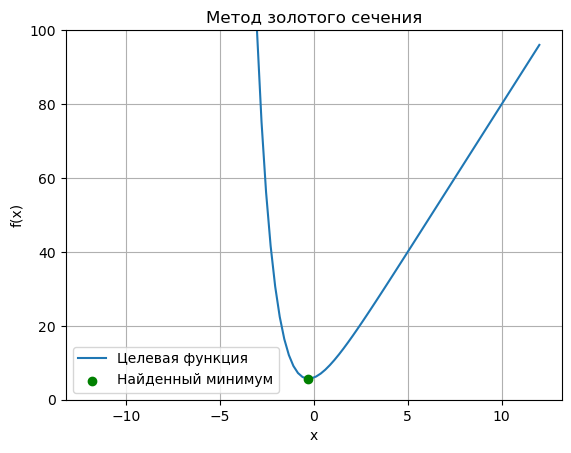

In [8]:

def golden_section_search_method(f, a, b, epsilon=6e-4):
    iterations = []
    
    # stop cycle when b-a is less than delta 
    while abs(b - a) >= epsilon:
        
        # find function in new values x1 and x2
        x1 = a + 0.382 * (b - a)
        x2 = b - 0.382 * (b - a)
        f_x1 = f(x1)
        f_x2 = f(x2)
        
        # --- just to remember list of opetations
        iterations.append((a, b, b-a, x1, x2, f(x1), f(x2)))

        # compare new values of the functions 
        # FIND MINIMUM 
        if f_x1 < f_x2:
            b = x2 
        if f_x1 >= f_x2:
            a = x1 
        if f_x1 == f_x2:
            a = x1
            b = x2
       

    return (a + b) / 2, iterations

if __name__ == "__main__":
    # parameters of the function
    a_param = 6.0
    b_param = 8.0

    def target_function(x):
        return a_param / np.exp(x) + b_param * x

    # Границы интервала поиска
    bound_a = -10
    bound_b = 11

    minimum_x, iterations = golden_section_search_method(target_function, bound_a, bound_b)
    minimum_value = target_function(minimum_x)

    print(f"Минимум функции находится в точке x ≈ {minimum_x}, значение функции ≈ {minimum_value}")

    # Визуализация
    x = np.linspace(-12, 12, 100)
    y = target_function(x)
    plt.plot(x, y, label='Целевая функция')

    plt.ylim(0, 100)

    plt.scatter(minimum_x, minimum_value, color='green', zorder=10, label='Найденный минимум')
    plt.grid(True)
    plt.title("Метод золотого сечения")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()

    for i, (a, b, b_minus_a, x1, x2, f_x1, f_x2) in enumerate(iterations):
        print(f"Итерация {i+1}: a={a:.5f}, b={b:.5f}, a-b={b_minus_a:.5f} x1={x1:.5f}, x2={x2:.5f}, f(x1)={f_x1:.5f}, f(x2)={f_x2:.5f}")